In [ ]:
import matlab.engine, numpy as np

eng = matlab.engine.start_matlab()
eng.cd(r"D:\AAI\ACSS\example_1", nargout=0)

out = eng.run_model(
    "model/topology_1.slx",
    "BuildDir", "build",
    "CleanAfterRun", True,
    "StopTime", "0.5",
    "Debug", True,
    nargout=1
)

if not out["ok"]:
    print(out["report"])
    raise RuntimeError("Sim failed")

t = np.array(out["t"]).squeeze() if len(out["t"]) else None
Vout = np.array(out["Vout"]).squeeze() if len(out["Vout"]) else None
print("t:", None if t is None else t.shape)
print("Vout:", None if Vout is None else Vout.shape)


t: (50001,)
Vout: (50001,)


In [16]:
out

{'ok': True,
 'model': 'topology_1',
 'simOut': <matlab.object at 0x216114cf630>,
 't': matlab.double([[0.0],[0.0001],[0.0002],[0.00030000000000000003],[0.0004],[0.0005],[0.0006000000000000001],[0.0007],[0.0008],[0.0009000000000000001],[0.001],[0.0011],[0.0012000000000000001],[0.0013000000000000002],[0.0014],[0.0015],[0.0016],[0.0017000000000000001],[0.0018000000000000002],[0.0019],[0.002],[0.0021000000000000003],[0.0022],[0.0023],[0.0024000000000000002],[0.0025],[0.0026000000000000003],[0.0027],[0.0028],[0.0029000000000000002],[0.003],[0.0031000000000000003],[0.0032],[0.0033],[0.0034000000000000002],[0.0035],[0.0036000000000000003],[0.0037],[0.0038],[0.0039000000000000003],[0.004],[0.0041],[0.004200000000000001],[0.0043],[0.0044],[0.0045000000000000005],[0.0046],[0.0047],[0.0048000000000000004],[0.0049],[0.005],[0.0051],[0.005200000000000001],[0.0053],[0.0054],[0.0055000000000000005],[0.0056],[0.0057],[0.0058000000000000005],[0.0059],[0.006],[0.0061],[0.006200000000000001],[0.0063],[0

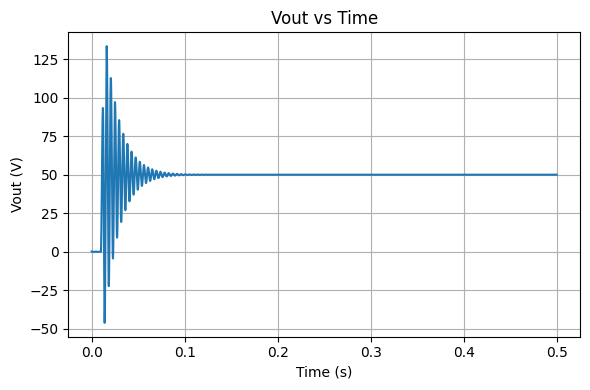

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Extract
t = np.array(out["t"]).squeeze()
Vout = np.array(out["Vout"]).squeeze()

# Plot
plt.figure(figsize=(6,4))
plt.plot(t, Vout)
plt.xlabel("Time (s)")
plt.ylabel("Vout (V)")
plt.title("Vout vs Time")
plt.grid(True)
plt.tight_layout()
plt.show()
